# Pathway Connection Analysis
Mira Welner
April 25

In [1]:
from PathwayAnalysis import PathwayAnalysis
import numpy as np
import matplotlib.pyplot as plt

The code was getting very messy so I made a pathway analysis object to ensure that the code was mantainable!

Now that I have improved the code speed it takes about a 8 seconds to set up

In [2]:
p = PathwayAnalysis(
    interactions_path="gene_data/interactions.txt",
    gene_path="gene_data/genes.csv",
    rnacounts_path="gene_data/pe-rna-counts.csv",
    metadata_path="gene_data/pe-rna-metadata.csv",
    pickle_path='A_B.pkl'
)

## Part 1: Does liklihood that pair will have a pathway increase as accuracy increases?

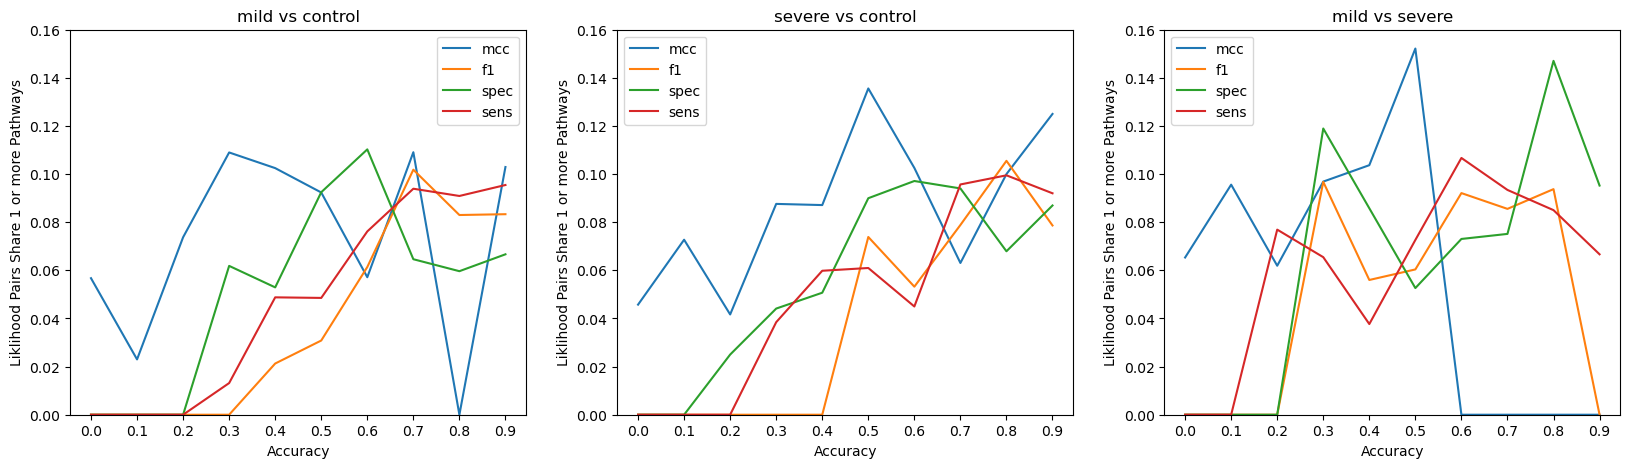

In [3]:
def make_hist(ax, title, contrast):
    ax.plot(np.arange(0,1,0.1), [p.prob_pathways(range=(i,i+0.1), contrast=contrast, metric='mcc') for i in np.arange(0,1,0.1)], label='mcc')
    ax.plot(np.arange(0,1,0.1), [p.prob_pathways(range=(i,i+0.1), contrast=contrast, metric='f1') for i in np.arange(0,1,0.1)], label='f1')
    ax.plot(np.arange(0,1,0.1), [p.prob_pathways(range=(i,i+0.1), contrast=contrast, metric='spec') for i in np.arange(0,1,0.1)], label='spec')
    ax.plot(np.arange(0,1,0.1), [p.prob_pathways(range=(i,i+0.1), contrast=contrast, metric='sens') for i in np.arange(0,1,0.1)], label='sens')
    ax.set_ylim(0,0.16)
    ax.legend()
    ax.set_xlabel("Accuracy")
    ax.set_ylabel("Liklihood Pairs Share 1 or more Pathways")
    ax.set_xticks(np.arange(0,1,0.1))
    ax.set_title(title)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
make_hist(axs[0], 'mild vs control','mild/control')
make_hist(axs[1], 'severe vs control','severe/control')
make_hist(axs[2], 'mild vs severe','mild/severe')
plt.savefig("ratio_plots.png")
plt.show()

The mmild vs severe plot doesn't behave well but it is always a weird cohort comparison.
The only other odd thing is that 0.8 - 0.9 mcc is a zero in the mild vs control plot. 

But in this particular case that is not becasue that range has 100% chance of being non-pathway but rather because no mcc values fall within that range

## Part 2: Regressions
Following this we need to see if the regressions result in tightly bound values around the regression line for each of the classes, and if they are more or less tightly bound for pair sharing values or non-pair sharing values

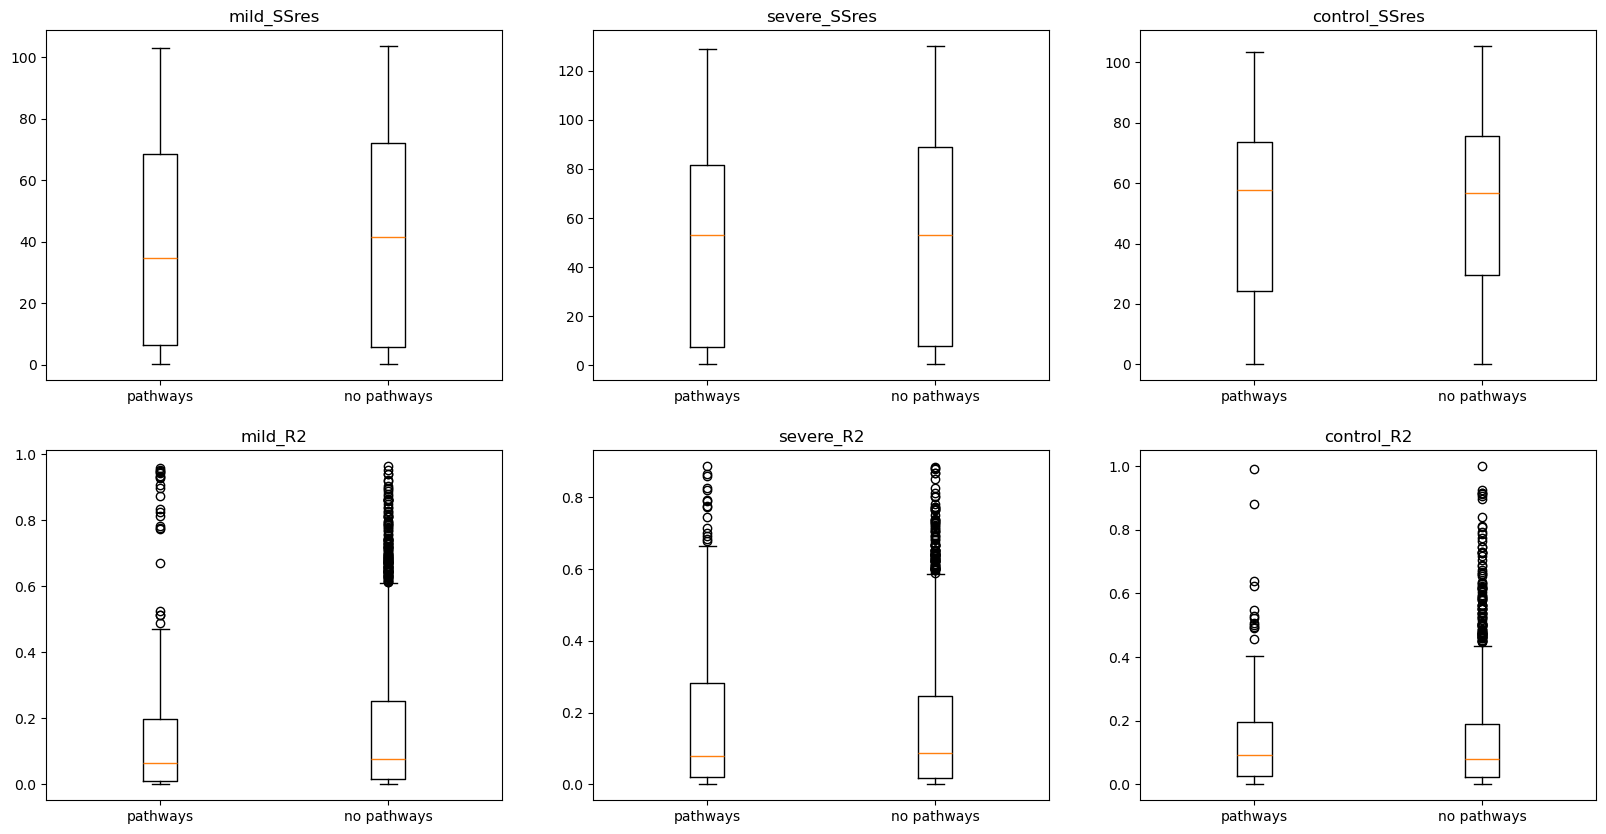

In [4]:
no_pathway, pathway = p.get_regression()
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(no_pathway.columns):
    axs[i%2,i//2].boxplot([pathway[col], no_pathway[col]], labels=['pathways', 'no pathways'])
    axs[i%2,i//2].set_title(col)

## Part 3: Contingency tables

In [5]:
p.contingency('severe/control', 'f1')

,>= 0.5,< 0.5
pathways,163,0
no pathways,1883,34


In [6]:
p.contingency('mild/control', 'f1')

,>= 0.5,< 0.5
pathways,162,1
no pathways,1879,38


In [7]:
p.contingency('mild/control', 'spec')

,>= 0.5,< 0.5
pathways,138,25
no pathways,1447,470


## Part 4: Individual Pairs
You mentioned the specific genes: NOS3, TNF, FN1, FPR3 and CCL5, so I analyzed the accuracies of pairs containing one or more of these genes. CCL5 was actually one of the four nodes that got eliminated when I did the 2nd review of the database so it was not included

Also the way that the plots are titled is based on the dataframe columns. So: sc = severe vs control, mc = mild vs control, and sm = severe vs mild

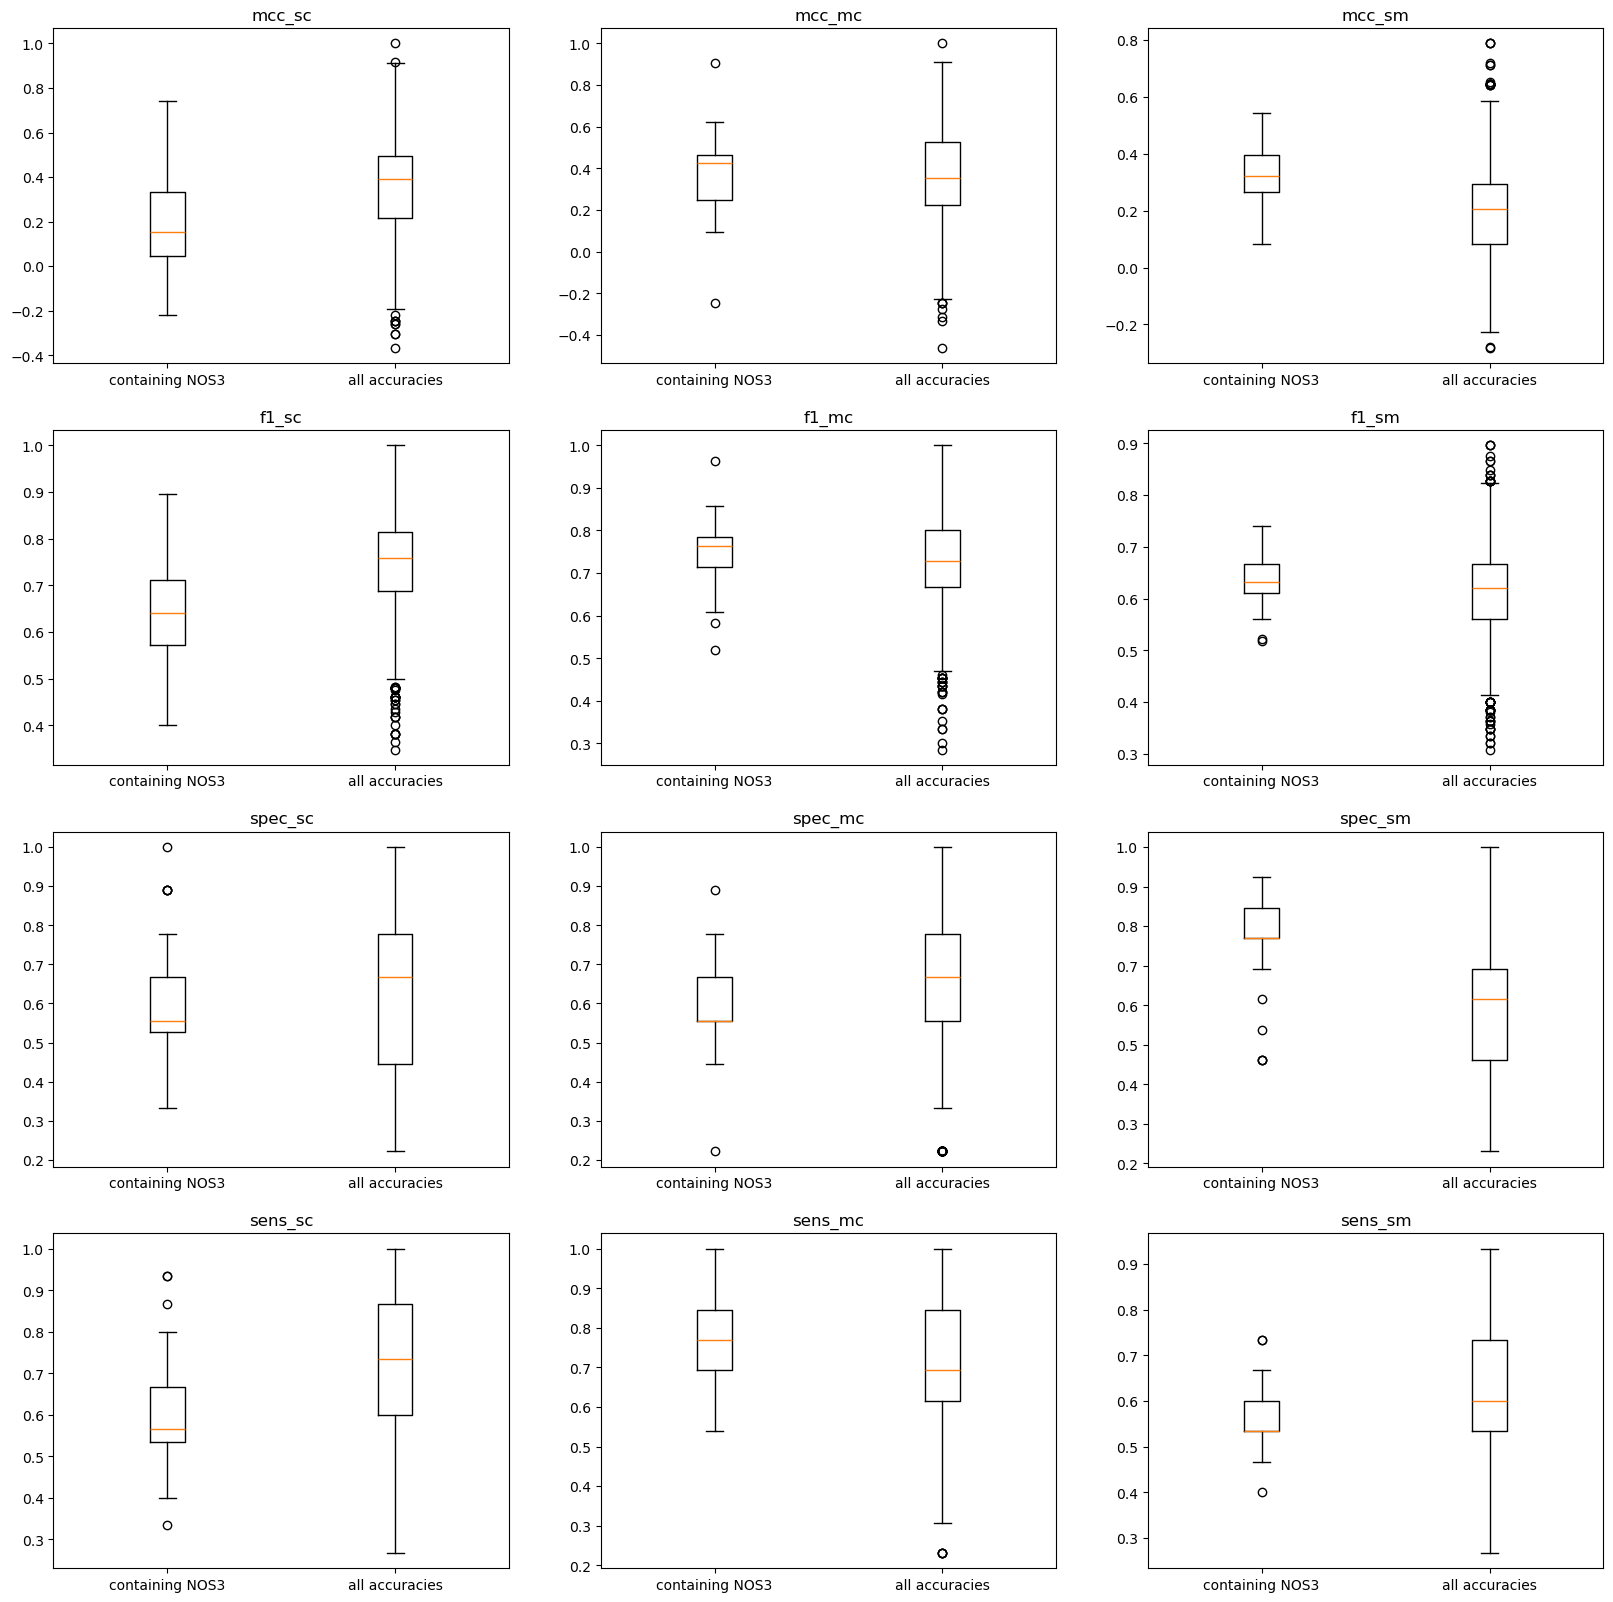

In [8]:
p.accuracies_for_gene('NOS3')

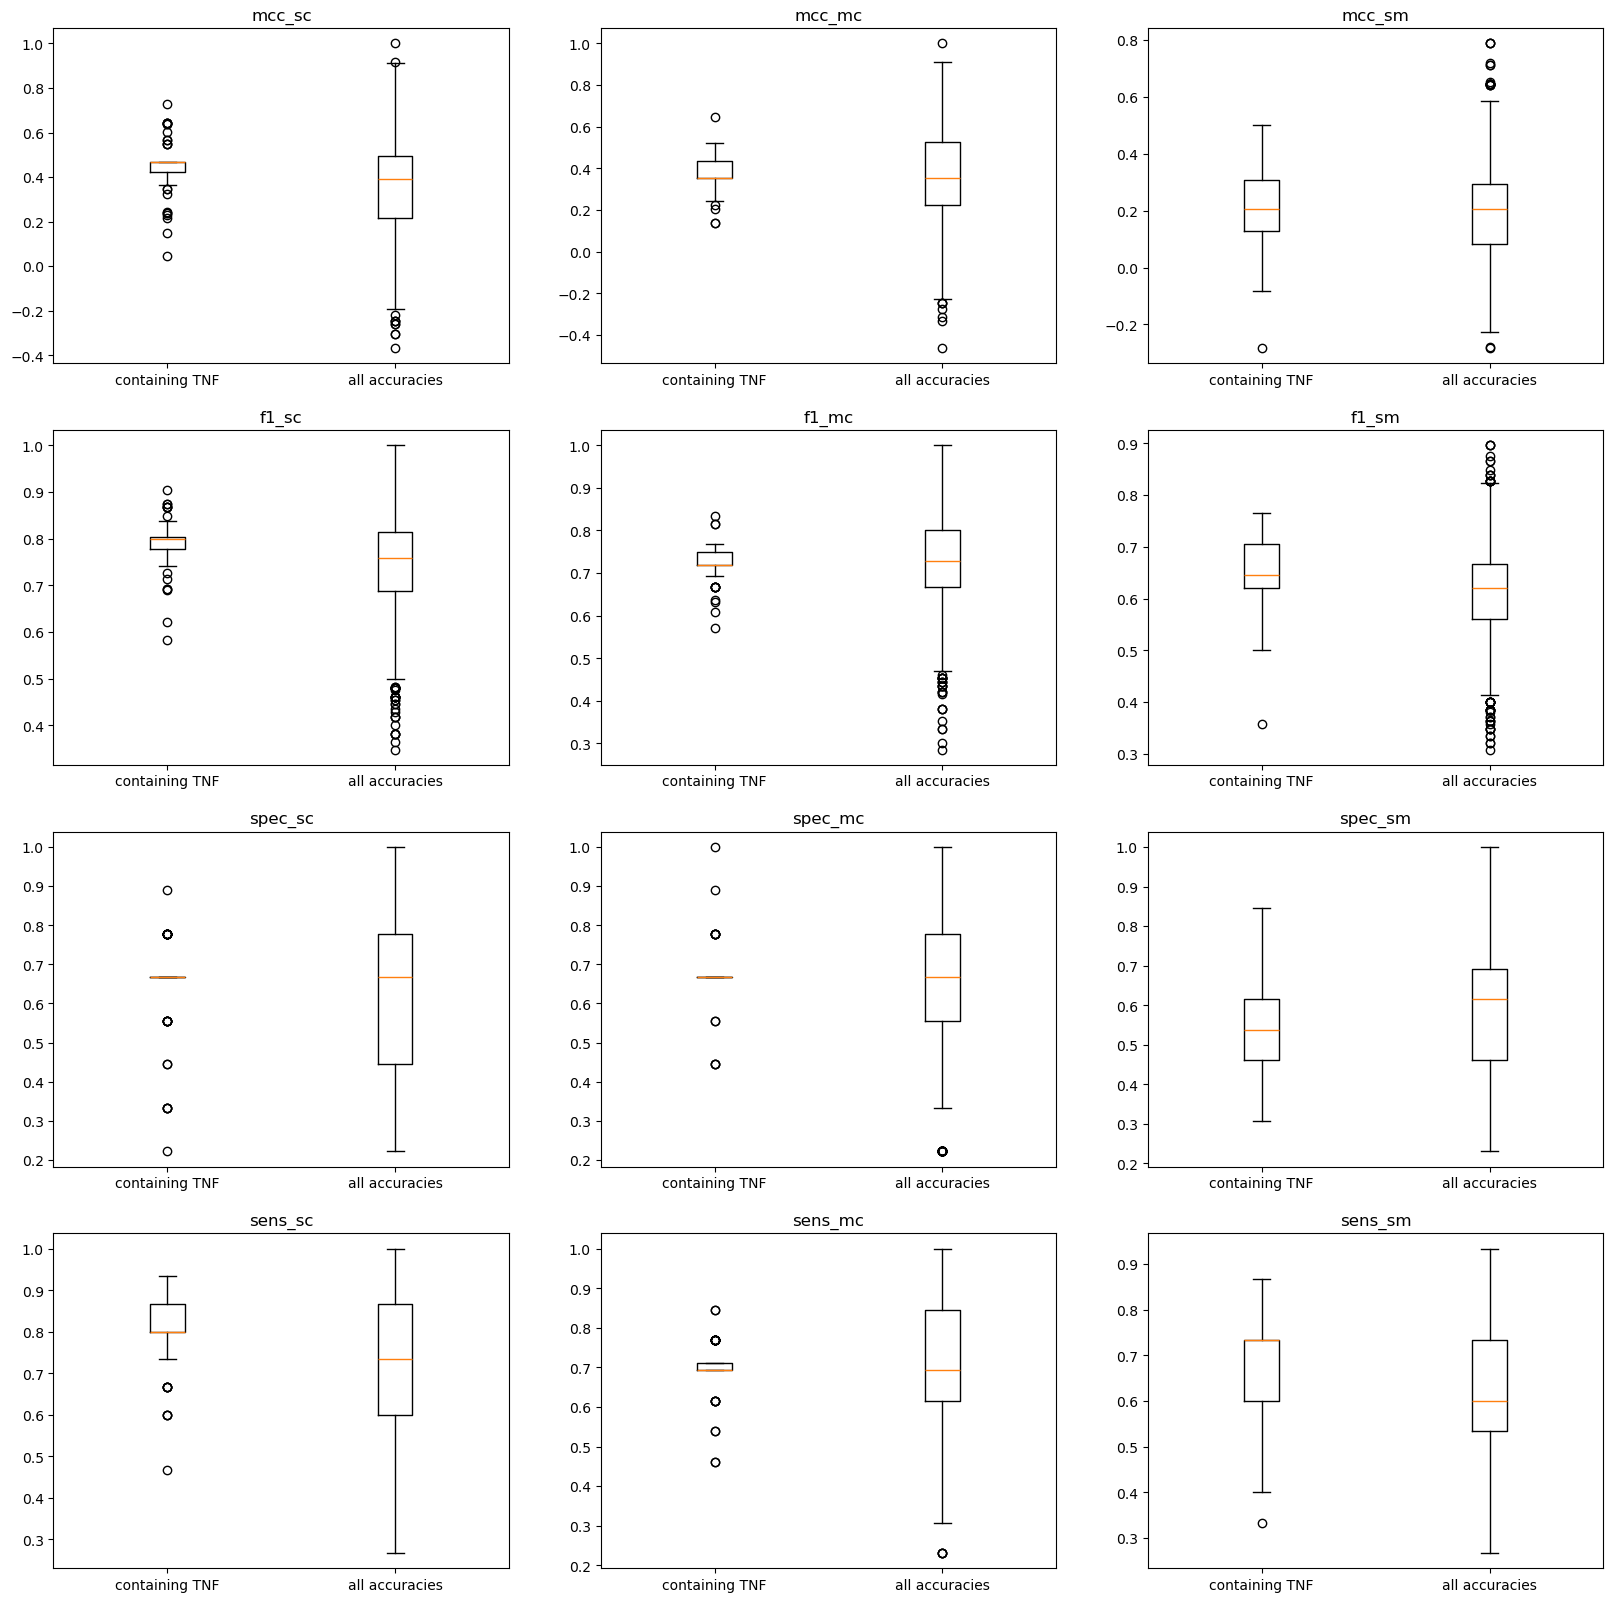

In [9]:
p.accuracies_for_gene('TNF')

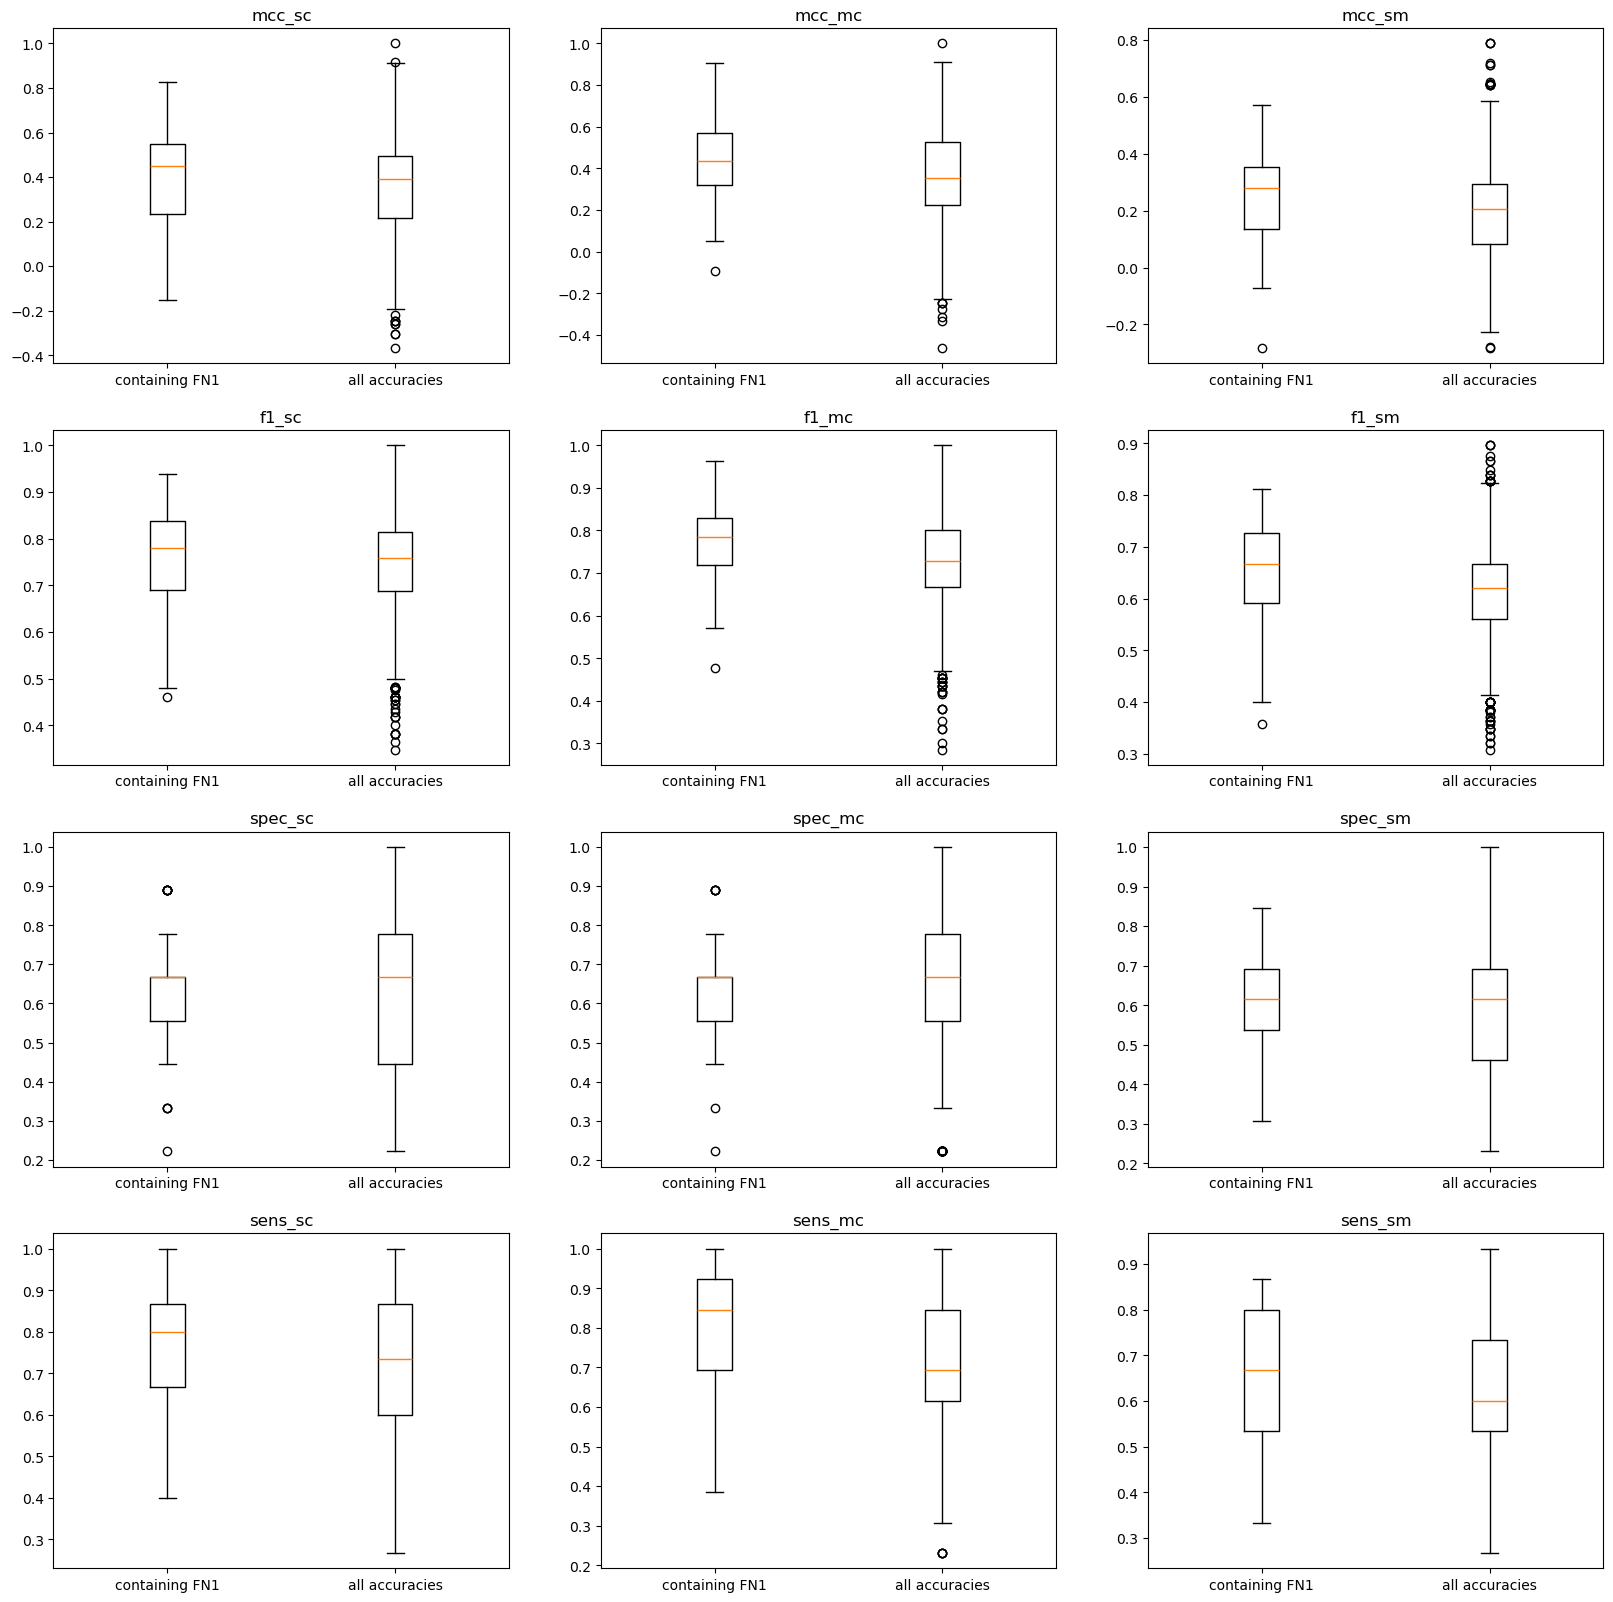

In [10]:
p.accuracies_for_gene('FN1')

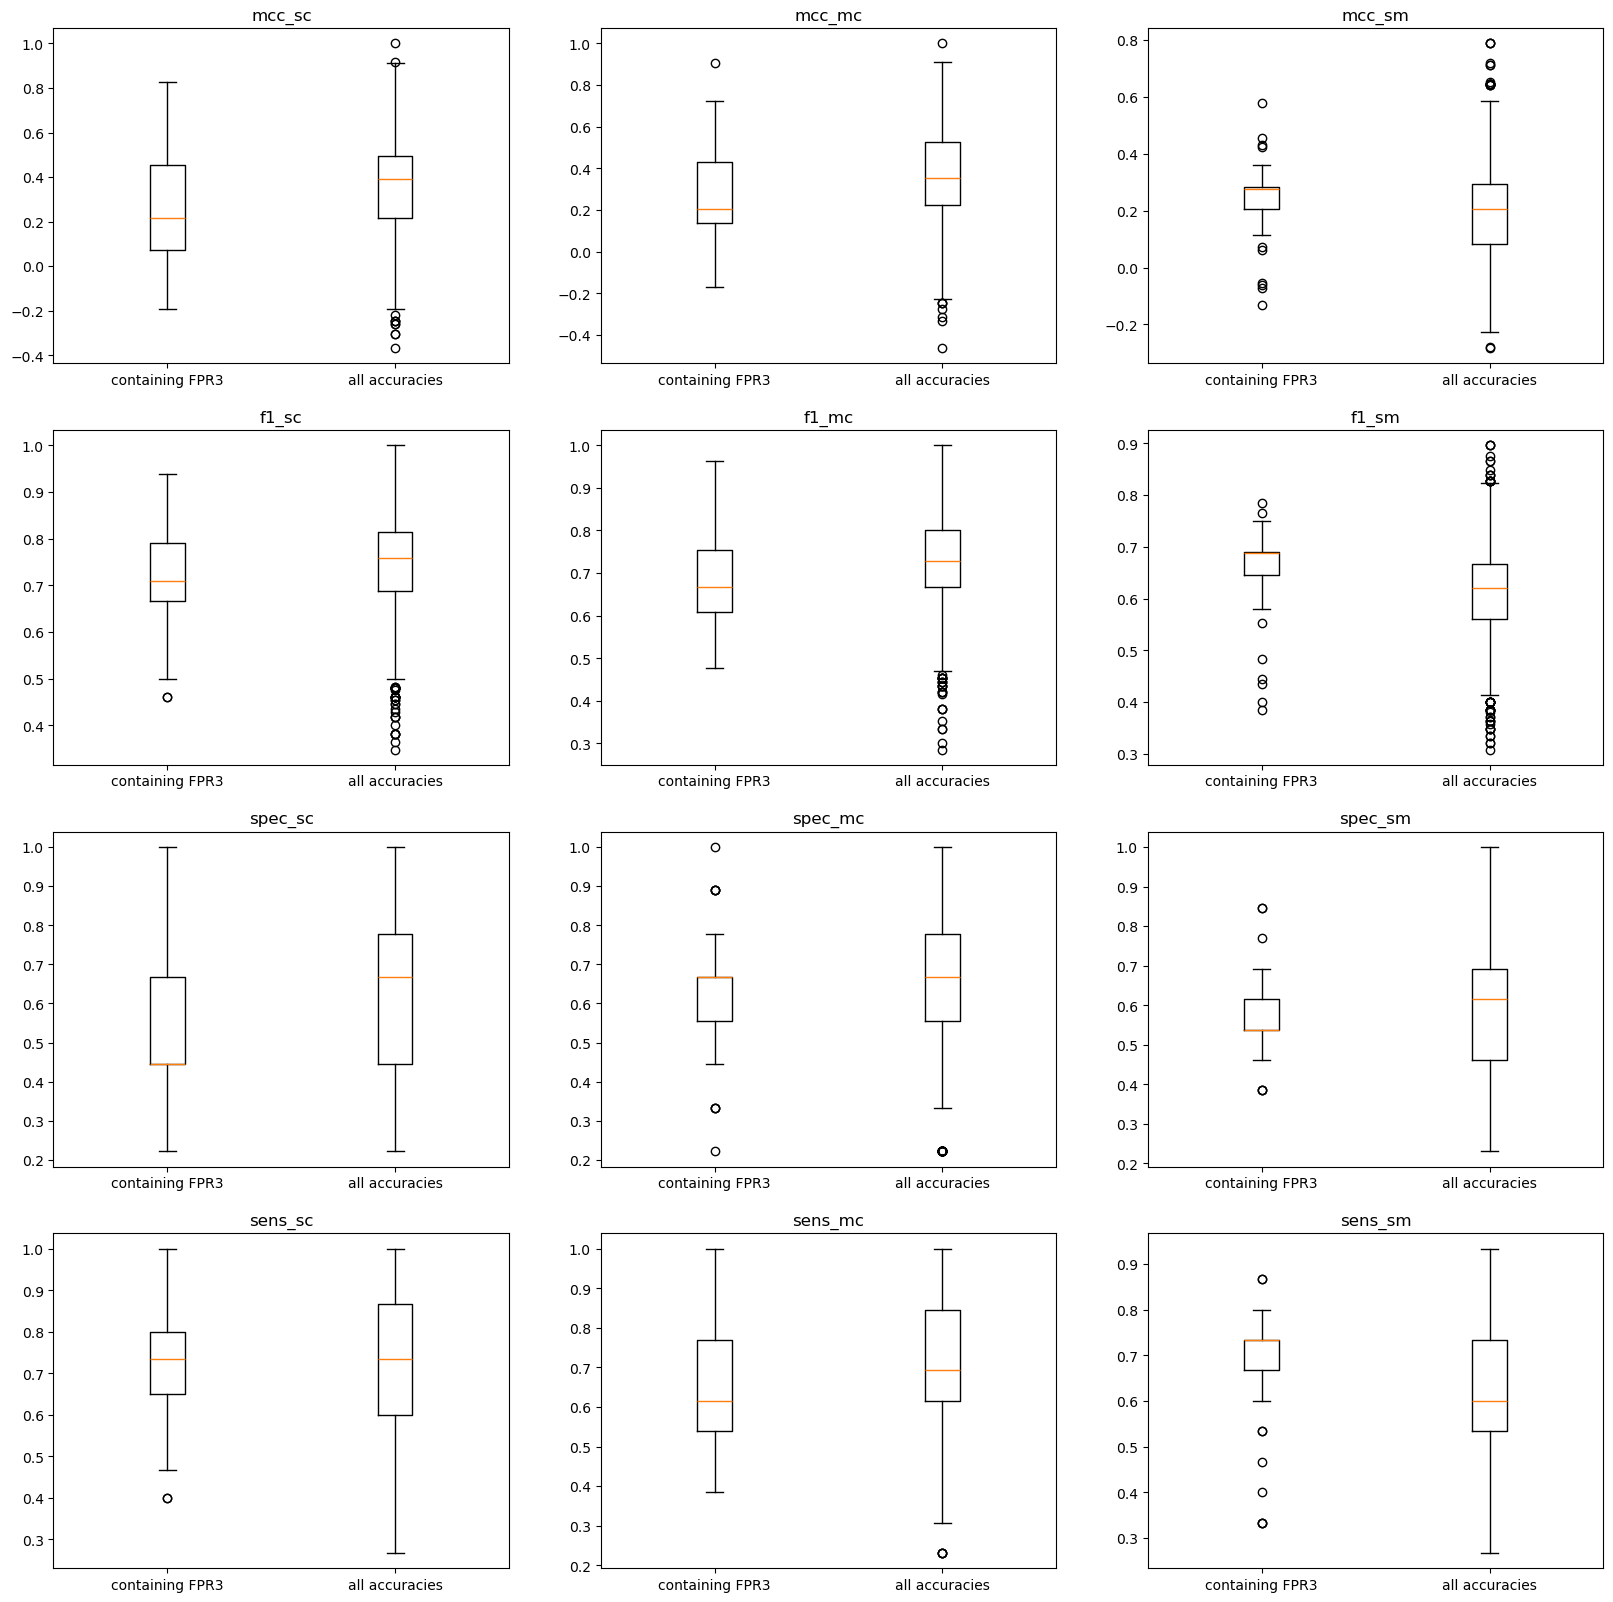

In [11]:
p.accuracies_for_gene('FPR3')